# Branton Data Features (Titanic)
**Author:** Branton Dawson  
**Date:** October 30, 2025  
**Objective:** Titanic Dataset - Working with data, visualizations, splitting.


## Introduction
This project uses the Titanic dataset. We'll clean the data, train a linear regression model, and explore ways to improve performance.

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [1]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows


In [2]:
# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Display basic information about the dataset using the info() method.

titanic.info()

# Display the first 10 rows.  If not the last statement in a Python cell, you'll have to wrap in the print() function to display.
print(titanic.head(10))

# Check for missing values using the isnull() method and then the sum() method.
print(titanic.isnull().sum())

titanic.isnull().sum()

# Display summary statistics using the describe() method

print(titanic.describe())

# Check for correlations using the corr() method and tell it to use only the numeric features. 

print(titanic.corr(numeric_only=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0 

Reflection 1:

1) How many data instances are there? 891
2) How many features are there? 15 features
3) What are the names? survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone
4) Are there any missing values? yes, in age, deck, embarked and embark_town
5) Are there any non-numeric features? yes
6) Are the data instances sorted on any of the attributes? no
7) What are the units of age? years (ranging from 0.42 to 80.0 years)
8) What are the minimum, median and max age? min=0.42, median=28.0, max=80.0
9) What two different features have the highest correlation? sibsp (siblings/spouses) and parch (parents/children) with correlation of 0.415. 
10) Are there any categorical features that might be useful for prediction? Yes, several highly predictive categorical features, including sex, pclass,embarked and deck.

## Section 2. Data Exploration and Preparation
### 2.1 Explore Data Patterns and Distributions

- Titanic contains both numeric and categorical variables, we'll use only numeric values here.
- Important:  Use only numeric attributes for the scatter matrix. 
- To explore categorical data, use count plots and bar plots instead.


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

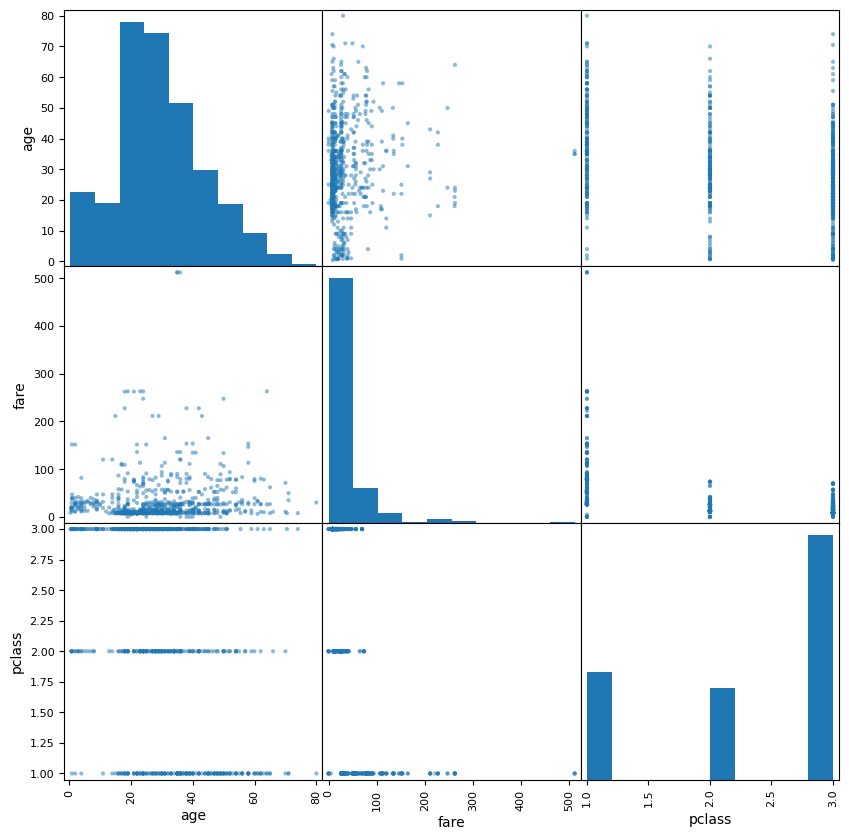

In [3]:
# Numerical data scatter matrix

attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

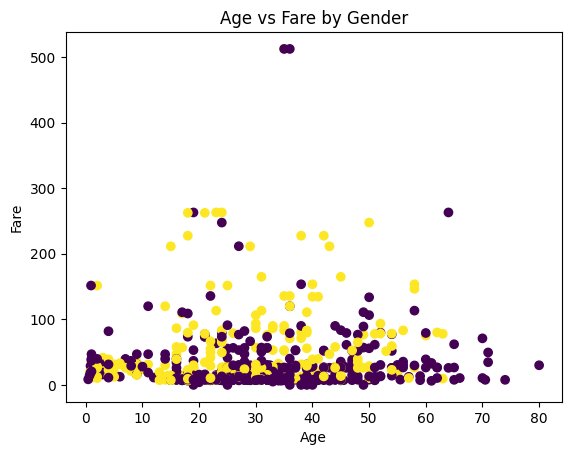

In [4]:
# Create a scatter plot of age vs fare, colored by gender:

plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

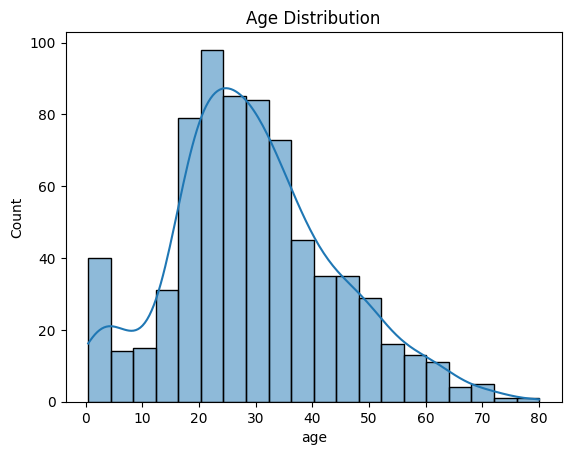

In [5]:
# Create a histogram of age:

sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()


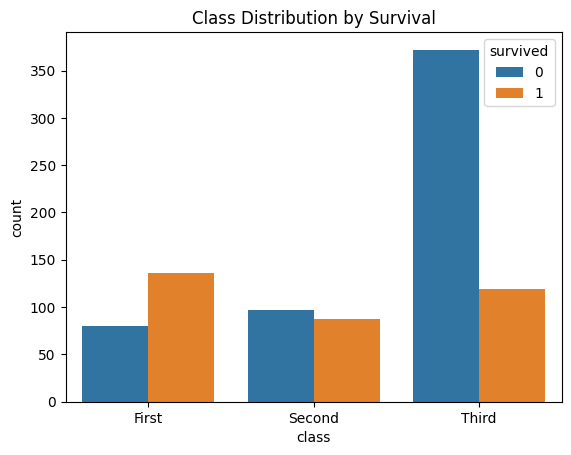

In [6]:
# Create a count plot for class and survival:

sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()


Reflection 2.1:

1. What patterns or anomalies do you notice? 
   - Survival by gender stands out with 74.2% female survival rate compared to a 18.9% male survival rate.  1st and 2nd class passengers also had a much great survival rate compared to the 3rd class passengers. 
2. Do any features stand out as potential predictors? 
   - Yes, sex, pclass, age, fare, and the sibsp/parch features.
3. Are there any visible class imbalances? 
   - Yes, the number that survived at 38% vs 62% that died.  Gender with 65% male vs 35% female passengers.  Emark port at 72% out of Southampton is a large imbalance. 

### 2.2 Handle Missing Values and Clean Data

In [7]:
# Age was missing values. We can impute missing values for age using the median:

titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Embark_town was missing values. We can drop missing values for embark_town (or fill with mode):

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


C:\Users\lpubjd1\AppData\Local\Temp\ipykernel_17388\801537.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\lpubjd1\AppData\Local\Temp\ipykernel_17388\801537.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


### 2.3 Feature Engineering

In [8]:
# Create a new feature: Family size

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categorical data to numeric:

titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Create a binary feature for 'alone':

titanic['alone'] = titanic['alone'].astype(int)


Reflection 2.3

1. Why might family size be a useful feature for predicting survival? 
   - Family size is a useful feature as women and children stayed together and likely had lifeboat priority.  
2. Why convert categorical data to numeric?
   - Date conversion is essential for making categorical information usable in mathematical models while preserving the meaningful relationships in the data.

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Select a target variable (as applicable)
    - Classification: Categorical target variable (e.g., gender, species).
    - Justify your selection with reasoning.

For classification, we’ll use survived as the target variable.

- Input features: age, fare, pclass, sex, family_size
- Target: survived


### 3.2 Define X and y

    - Assign input features to X
    - Assign target variable to y (as applicable)


In [9]:
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

Reflection 3:

1. Why are these features selected?
- These features are the most useful in predicting survival rate.
2. Are there any features that are likely to be highly predictive of survival?
- Yes, gender, passenger class, fare, age and family size are features that are likely to be highly predictive.

## Section 4. Splitting

- Split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second. 
- Compare.

### Basic Train/Test split


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size:', len(X_train))
print('Test size:', len(X_test))
print('Train size:', len(y_train))
print('Test size:', len(y_test))


Train size: 712
Test size: 179
Train size: 712
Test size: 179


### Stratified Train/Test split

In [11]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


### Compare Results

In [12]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


Reflection 4:

1. Why might stratification improve model performance?
    - It ensures the test sets will be a more realistic distribution. Not using it can lead to biased predictions favoring the majority classes.
2. How close are the training and test distributions to the original dataset?
    - The Original numbers were 61.6% died and 38.4% survived.
    - The Basic training set was very close at just 0.5% deviation showing 61.1% died / 38.9% survived.
    - The Basic test set was not as close at 2.1% deviation, with 63.7% died / 36.3% survived.
3. Which split method produced better class balance?
    - Stratified splitting produces better class balance because it's designed to maintain exact proportional representation.

## Bonus

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows


In [13]:
# Load Pima Indians Diabetes dataset
pima = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', header=None)

# Display basic information about the dataset using the info() method.
pima.info()

# Display the first 10 rows.  If not the last statement in a Python cell, you'll have to wrap in the print() function to display.
print(pima.head(10))

# Check for missing values using the isnull() method and then the sum() method.
print(pima.isnull().sum())

# Display summary statistics using the describe() method
print(pima.describe())

# Check for correlations using the corr() method and tell it to use only the numeric features.
print(pima.corr(numeric_only=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
    0    1   2   3    4     5      6   7  8
0   6  148  72  35    0  33.6  0.627  50  1
1   1   85  66  29    0  26.6  0.351  31  0
2   8  183  64   0    0  23.3  0.672  32  1
3   1   89  66  23   94  28.1  0.167  21  0
4   0  137  40  35  168  43.1  2.288  33  1
5   5  116  74   0    0  25.6  0.201  30  0
6   3   78  50  32   88  31.0  0.248  26  1
7  10  115   0   0    0  35.3  0.134  29  0
8   2  197  70  45  543  30.5  0.158  53  

Reflection 1:

1) How many data instances are there? 768
2) How many features are there? 9 features
3) What are the names? 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
4) Are there any missing values? no
5) Are there any non-numeric features? no
6) Are the data instances sorted on any of the attributes? no
7) What are the units?  (ranging from 0.000 846.000)
8) What are the minimum, median and max of 4? min=0.000, median=79.799, max=846.000
9) What two different features have the highest correlation? 0 and 7 with correlation of 0.544. 
10) Are there any features that might be useful for prediction? Yes, 0 and 7, as well as 1 and 8.

## Section 2. Data Exploration and Preparation
### 2.1 Explore Data Patterns and Distributions

- Pima contains numeric values.
- Important:  Use only numeric attributes for the scatter matrix. 
- To explore categorical data, use count plots and bar plots instead.

### 2.2 Handle Missing Values and Clean Data

There were no missing values.


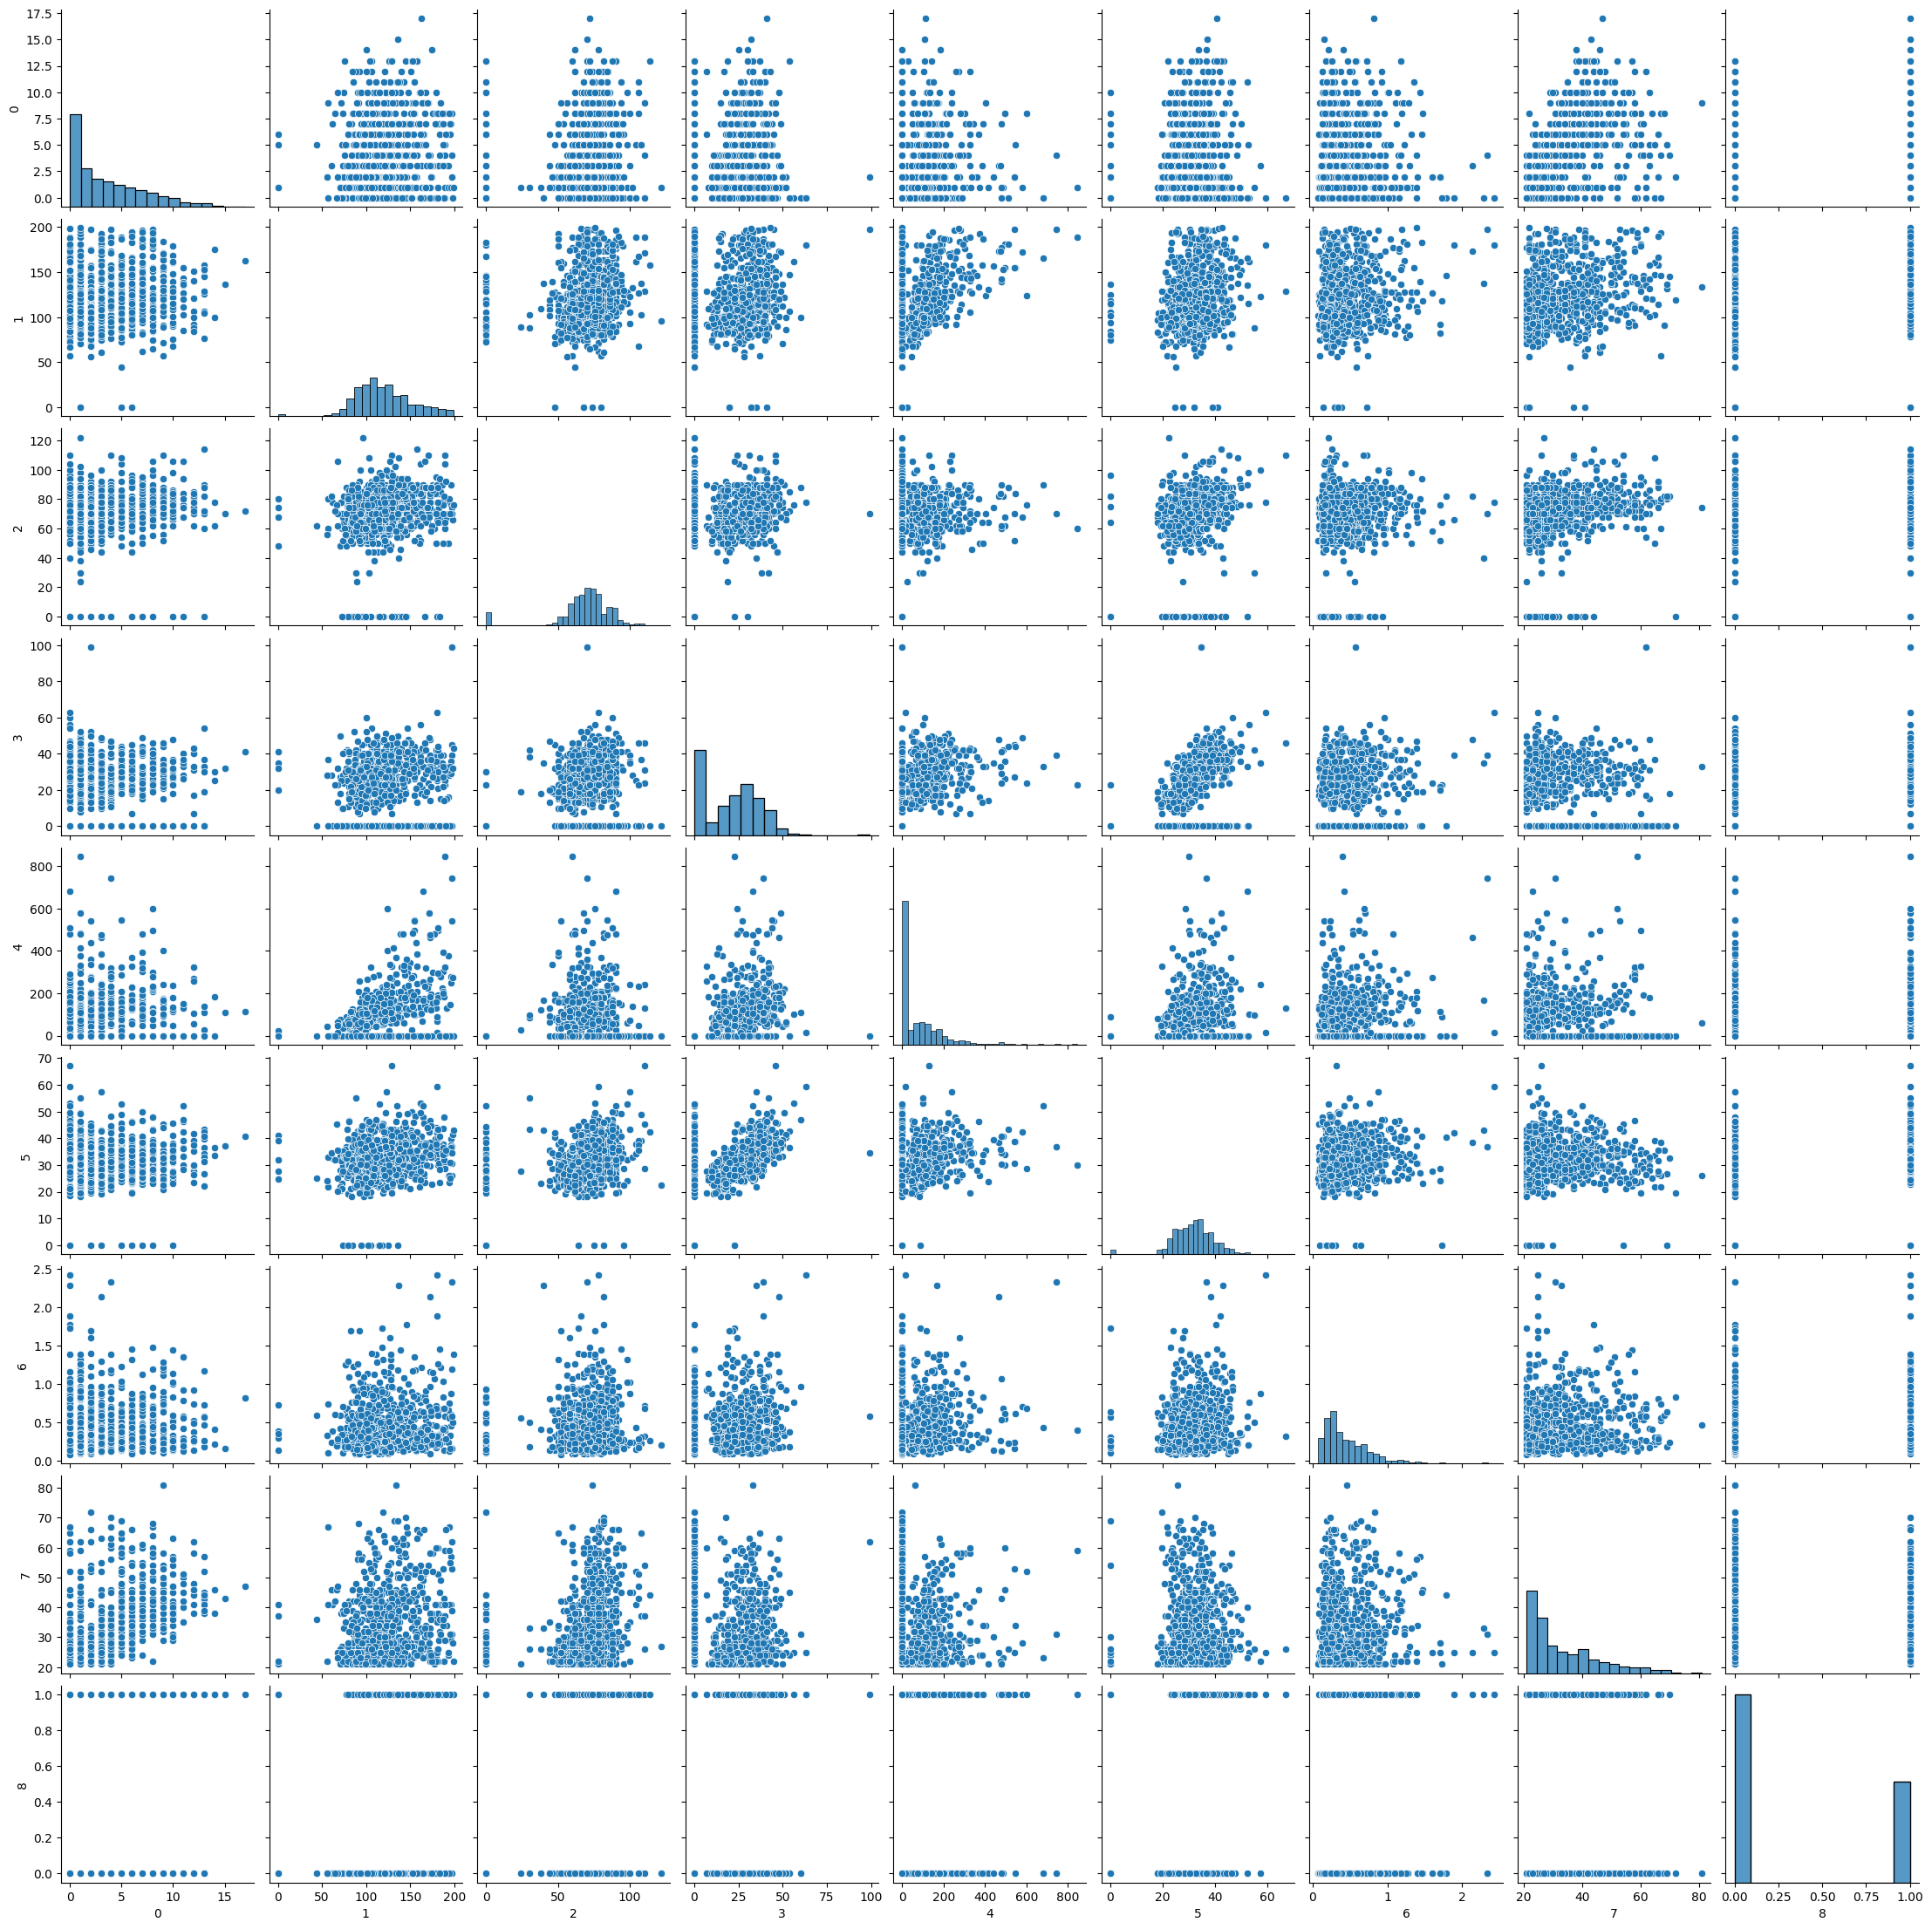

In [14]:
# Numerical data scatter matrix
sns.pairplot(pima)

### Add column names to the Pima dataset

In [15]:
# Add proper column names to the Pima dataset
column_names = [
    'Pregnancies',           # Number of times pregnant
    'Glucose',              # Plasma glucose concentration (mg/dL)
    'BloodPressure',        # Diastolic blood pressure (mm Hg)
    'SkinThickness',        # Triceps skin fold thickness (mm)
    'Insulin',              # 2-Hour serum insulin (mu U/ml)
    'BMI',                  # Body mass index (weight in kg/(height in m)^2)
    'DiabetesPedigreeFunction', # Diabetes pedigree function (genetic influence)
    'Age',                  # Age (years)
    'Outcome'               # Class variable (0=no diabetes, 1=diabetes)
]

pima.columns = column_names

print("PIMA INDIANS DIABETES DATASET - FEATURE MEANINGS:")
print("=" * 60)
print("1. Pregnancies: Number of times pregnant")
print("2. Glucose: Plasma glucose concentration after 2hrs oral glucose tolerance test (mg/dL)")
print("3. BloodPressure: Diastolic blood pressure (mm Hg)")
print("4. SkinThickness: Triceps skin fold thickness (mm)")
print("5. Insulin: 2-Hour serum insulin (mu U/ml)")
print("6. BMI: Body mass index (weight in kg/(height in m)^2)")
print("7. DiabetesPedigreeFunction: Diabetes pedigree function (genetic predisposition)")
print("8. Age: Age in years")
print("9. Outcome: Target variable (0 = No diabetes, 1 = Has diabetes)")

print("\nDataset with proper column names:")
print(pima.head(10))


PIMA INDIANS DIABETES DATASET - FEATURE MEANINGS:
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration after 2hrs oral glucose tolerance test (mg/dL)
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function (genetic predisposition)
8. Age: Age in years
9. Outcome: Target variable (0 = No diabetes, 1 = Has diabetes)

Dataset with proper column names:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      1

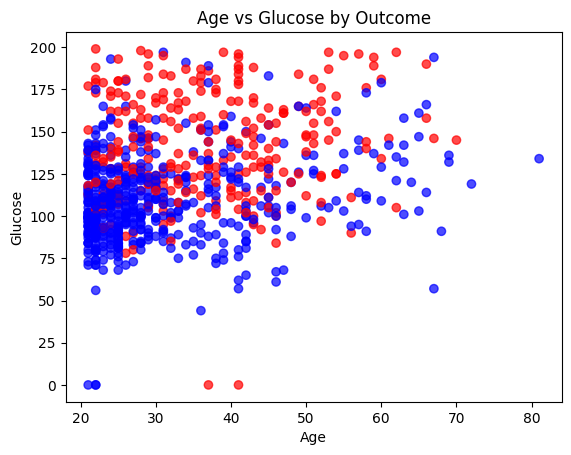

In [16]:
# Create a scatter plot of age vs Glucose, colored by Outcome
plt.scatter(pima['Age'], pima['Glucose'], c=pima['Outcome'], cmap='bwr', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Age vs Glucose by Outcome')
plt.show()


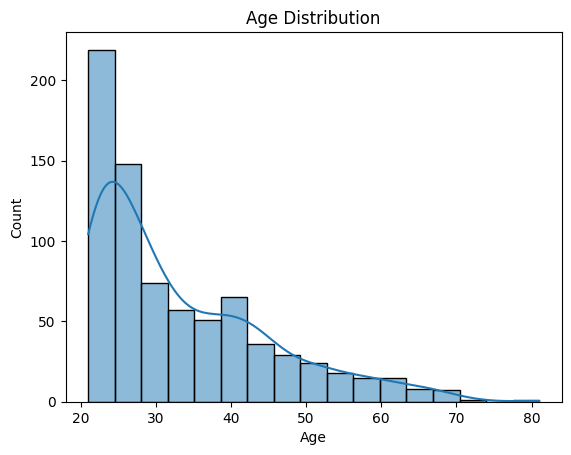

In [17]:
# Create a histogram of age:
sns.histplot(pima['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

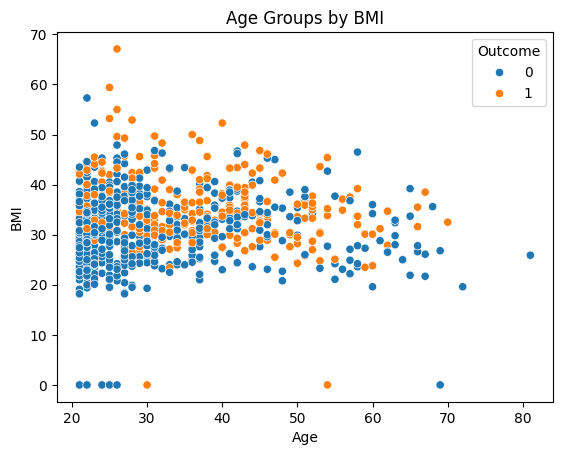

In [18]:
# Create a scatter plot for age groups and bmi:
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=pima)
plt.title('Age Groups by BMI')
plt.show()

Reflection 2.1:

1. What patterns or anomalies do you notice? 
    - The majority with outcome of 1 tend to have a higher BMI.
2. Do any features stand out as potential predictors? 
    - Glucose it the primary predicdtor.  BMI is also a good predictor.
3. Are there any visible class imbalances? Age looks imbalanced.  
    - The age distribution is skewed toward younger population with 54.35 under 30.  And another 20.4% between 30-40 years old.  

### 2.3 Feature Engineering

- Create Age range groups
- Create BMI range groups

These will be useful to predict by age ranges and BMI and it will help create cleaner looking chart data.

In [19]:
# Create feature to create BMI ranges in the Pima data
def bmi_range(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'
pima['BMI_Range'] = pima['BMI'].apply(bmi_range)
# Create feature to create Age ranges in the Pima data
def age_range(age):
    if age < 30:
        return 'Under 30'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    else:
        return '60+'
pima['Age_Range'] = pima['Age'].apply(age_range)
print(pima[['Age', 'Age_Range', 'BMI', 'BMI_Range']].head(10))


   Age Age_Range   BMI      BMI_Range
0   50     50-59  33.6        Obesity
1   31     30-39  26.6     Overweight
2   32     30-39  23.3  Normal weight
3   21  Under 30  28.1     Overweight
4   33     30-39  43.1        Obesity
5   30     30-39  25.6     Overweight
6   26  Under 30  31.0        Obesity
7   29  Under 30  35.3        Obesity
8   53     50-59  30.5        Obesity
9   54     50-59   0.0    Underweight


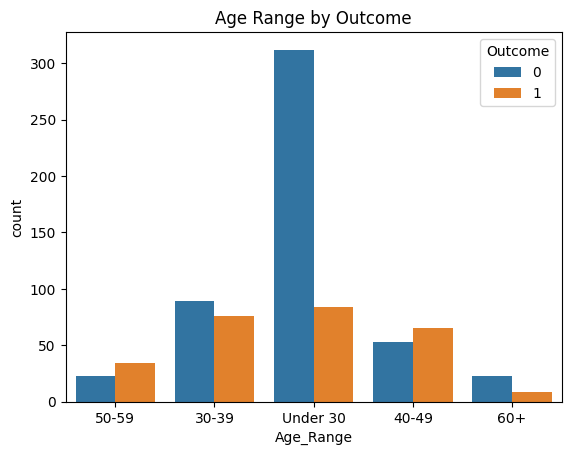

In [20]:
# create histogram of Age Ranges
sns.countplot(x='Age_Range', hue='Outcome', data=pima)
plt.title('Age Range by Outcome')
plt.show()

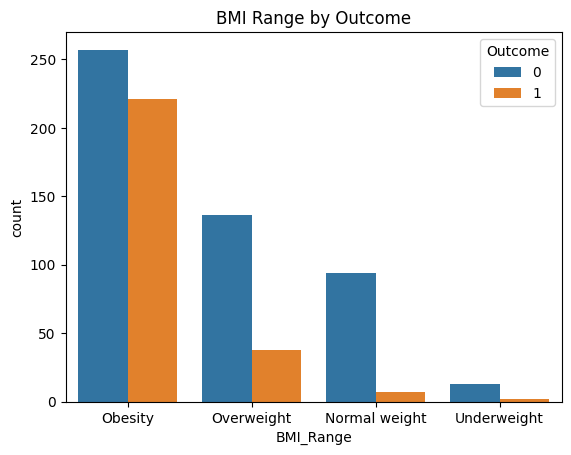

In [21]:
# create histogram of BMI Ranges
sns.countplot(x='BMI_Range', hue='Outcome', data=pima)
plt.title('BMI Range by Outcome')
plt.show()

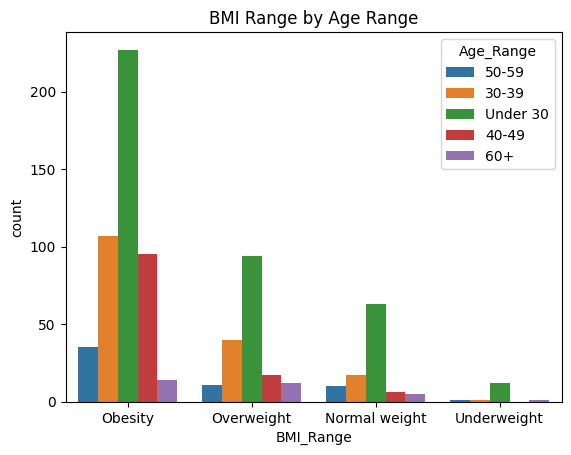

In [22]:
# Create countplot for BMI Range and Age Range
sns.countplot(x='BMI_Range', hue='Age_Range', data=pima)
plt.title('BMI Range by Age Range')
plt.show()

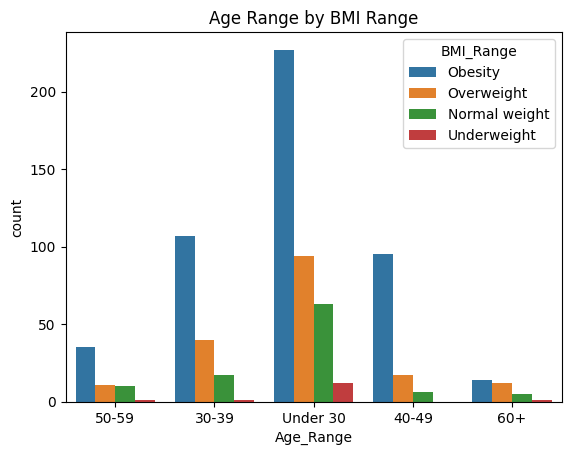

In [23]:
# Create countplot for age range and BMI range
sns.countplot(x='Age_Range', hue='BMI_Range', data=pima)
plt.title('Age Range by BMI Range')
plt.show()

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Select a target variable (as applicable)
    - Classification: Categorical target variable (e.g., gender, species).
    - Justify your selection with reasoning.

For classification, we’ll use outcome as the target variable.

- Input features: age, BMI, Glucose, DiabetesPedigreeFunction
- Target: outcome


### 3.2 Define X and y

    - Assign input features to X
    - Assign target variable to y (as applicable)


In [24]:
# Define input features and target variable
X = pima[['Age', 'BMI', 'Glucose', 'DiabetesPedigreeFunction']]
y = pima['Outcome']

## Section 4. Splitting

- Split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second. 
- Compare.

### Basic Train/Test split


In [25]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print('Train size:', len(x_train))
print('Test size:', len(X_test))

Train size: 614
Test size: 154


### Stratified Train/Test split

In [26]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
print('Train size:', len(train_set))
print('Test size:', len(test_set))



Train size: 614
Test size: 154


### Compare

In [27]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['Glucose'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['Glucose'].value_counts(normalize=True))

Original Class Distribution:
 Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64
Train Set Class Distribution:
 Glucose
99     0.024430
102    0.021173
129    0.021173
111    0.019544
100    0.019544
         ...   
61     0.001629
190    0.001629
166    0.001629
82     0.001629
172    0.001629
Name: proportion, Length: 131, dtype: float64
Test Set Class Distribution:
 Glucose
100    0.032468
116    0.032468
90     0.025974
125    0.025974
138    0.025974
         ...   
174    0.006494
135    0.006494
155    0.006494
195    0.006494
177    0.006494
Name: proportion, Length: 82, dtype: float64




Target variable distribution:
No Diabetes (0): 500 (65.1%)
Has Diabetes (1): 268 (34.9%)

Key insights about the features:
- Glucose: Most important predictor - high glucose indicates diabetes risk
- BMI: Higher BMI associated with increased diabetes risk
- Age: Diabetes risk increases with age
- DiabetesPedigreeFunction: Measures genetic predisposition to diabetes